### 1. 모듈 불러오기

In [99]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [100]:
# 그래프 내 한글 깨짐

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 2. 데이터 불러오기

- `활용 데이터` : 자동차부품 데이터셋.csv
 
- `설명변수` : 환율, 소비자 물가지수, 기준금리(연%), 국제유가, SCFI, 고용률(%), 가동률지수(원지수)

In [101]:
df = pd.read_csv('../Data Preprocessing/자동차부품 데이터셋.csv', encoding='cp949')
df = df.iloc[:, 1:]
df.head()

,시점,수출액,수입액,환율,소비자 물가지수,기준금리(연%),국제유가,SCFI,고용률(%),가동률지수(원지수)
0,2015.01,2262441,410713,1093.5,94.643,2.00,45.77,1051.18,59.0,105.8
1,2015.02,1963200,347320,1098.4,94.587,2.00,55.69,1071.73,59.1,90.5
2,2015.03,2371707,459833,1109.5,94.596,1.75,54.69,868.47,59.8,107.8
3,2015.04,2493058,464552,1072.4,94.625,1.75,57.72,748.39,60.6,106.7
4,2015.05,2168130,424571,1108.2,94.890,1.75,63.02,731.35,61.2,97.2


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          84 non-null     float64
 1   수출액         84 non-null     int64  
 2   수입액         84 non-null     int64  
 3   환율          84 non-null     float64
 4   소비자 물가지수    84 non-null     float64
 5   기준금리(연%)    84 non-null     float64
 6   국제유가        84 non-null     float64
 7   SCFI        84 non-null     float64
 8   고용률(%)      84 non-null     float64
 9   가동률지수(원지수)  84 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 6.7 KB


`Null값 없고, 모든 데이터가 float, int형이므로 따로 인코딩 필요 없음`

### 3. 데이터 전처리하기

In [103]:
# 종속변수, 독립변수 따로 데이터 프레임 형태로 변환
X = pd.DataFrame(df.iloc[:, 3:10])
y = pd.DataFrame(df.iloc[:, 1])

In [104]:
X.head()

,환율,소비자 물가지수,기준금리(연%),국제유가,SCFI,고용률(%),가동률지수(원지수)
0,1093.5,94.643,2.00,45.77,1051.18,59.0,105.8
1,1098.4,94.587,2.00,55.69,1071.73,59.1,90.5
2,1109.5,94.596,1.75,54.69,868.47,59.8,107.8
3,1072.4,94.625,1.75,57.72,748.39,60.6,106.7
4,1108.2,94.890,1.75,63.02,731.35,61.2,97.2


In [105]:
y.head()

,수출액
0,2262441
1,1963200
2,2371707
3,2493058
4,2168130


In [106]:
# Train, Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

### 4. 선형회귀 모델 구축

- OLS : 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS)를 최소화하는 가중치 구하는 방법
- 모델 선언 : model = sm.OLS(Y데이터, X데이터)
- 모델 학습 : model_trained = model.fit()

In [107]:
# (1) 선형회귀 모델 가정 확인하기

X_train = sm.add_constant(X_train)  
# add_constant: 베타0을 구성될 수 있도록 임의의 1로 된 벡터를 컬럼에 추가
model = sm.OLS(y_train, X_train, axis=1) # 모델 선언
model_trained = model.fit() # 모델 학습

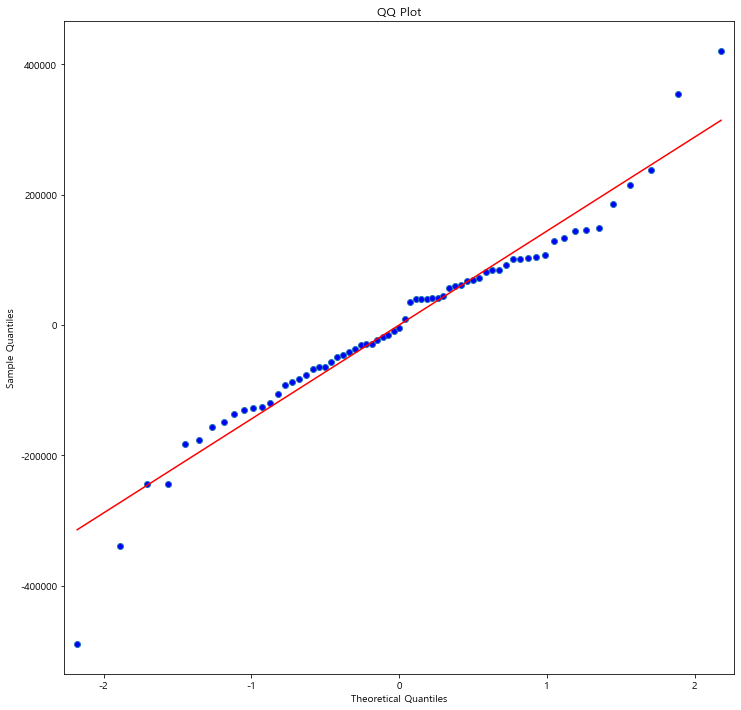

In [108]:
# (2) 확률오차의 정규성 확인

model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False  # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

C:\Users\phi49\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

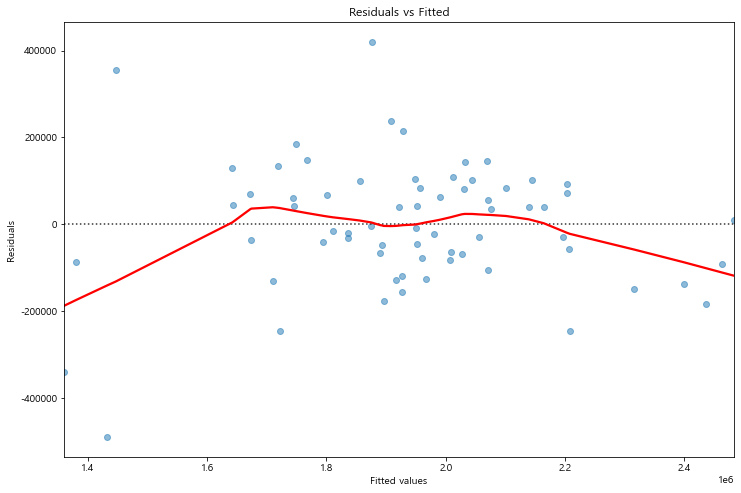

In [109]:
# (3) 확률 오차의 등분산성 확인

model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True,
             scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [110]:
# (4) 통계적으로 설명 (해석)
# - R-squared(결정계수): 모형의 성능
# - coef(회귀계수) : X가 한 단위 증가할 때, Y의 변화량
# - P > [t] (p-value) : 0.05(유의수준) 이하일 때 변수가 유의미

model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수출액   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     22.23
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           2.17e-14
Time:                        12:40:02   Log-Likelihood:                -891.00
No. Observations:                  67   AIC:                             1798.
Df Residuals:                      59   BIC:                             1816.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.082e+06   2.27e+06      3.119      0.003    2.54e+06    1.16e+07
환율          -724.6979    568.598     -1.275      0.207   -1862.460     413.064
소비자 물가지수   -6.538e+04   1.91e+04     -3.420      0.001   -1.04e+05   -2.71e+04
기준금리(연%)    3292.9839   8.59e+04      0.038      0.970   -1.69e+05    1.75e+05
국제유가        5604.2952   3178.768      1.763      0.083    -756.405     1.2e+04
SCFI          66.2822     29.924      2.215      0.031       6.404     126.160
고용률(%)      4116.1505   2.29e+04      0.180      0.858   -4.17e+04       5e+04
가동률지수(원지수)  1.628e+04   2214.139      7.352      0.000    1.18e+04    2.07e+04
==============================================================================
Omnibus:                        6.589   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                9.717
Skew:                          -0.236   Prob(JB):                      0.00776
Kurtosis:                       4.805   Cond. No.                     2.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
# 모델 선언
model = sm.OLS(y_train, X_train.drop(['환율', '기준금리(연%)', '고용률(%)'], axis=1))

# 모델 학습
model_trained = model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수출액   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     39.17
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           2.49e-16
Time:                        12:40:10   Log-Likelihood:                -892.03
No. Observations:                  67   AIC:                             1794.
Df Residuals:                      62   BIC:                             1805.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.27e+06   1.36e+06      5.356      0.000    4.56e+06    9.98e+06
소비자 물가지수   -7.383e+04   1.33e+04     -5.535      0.000      -1e+05   -4.72e+04
국제유가        7129.5778   1701.588      4.190      0.000    3728.151    1.05e+04
SCFI          70.6213     26.636      2.651      0.010      17.377     123.865
가동률지수(원지수)  1.606e+04   2178.844      7.369      0.000    1.17e+04    2.04e+04
==============================================================================
Omnibus:                        7.727   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               12.781
Skew:                          -0.271   Prob(JB):                      0.00168
Kurtosis:                       5.070   Cond. No.                     1.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`최종적으로 회귀식을 정리해보면`

`수출액 = -7.383e+04 * 소비자 물가지수 + 71.29.5778 * 국제유가 + 70.6213 * SCFI + 1.606e+04 * 가동률지수(원지수) + 7.27e+06`

 ### 5. 예측 : 미래의 반응변수 값 예측하기

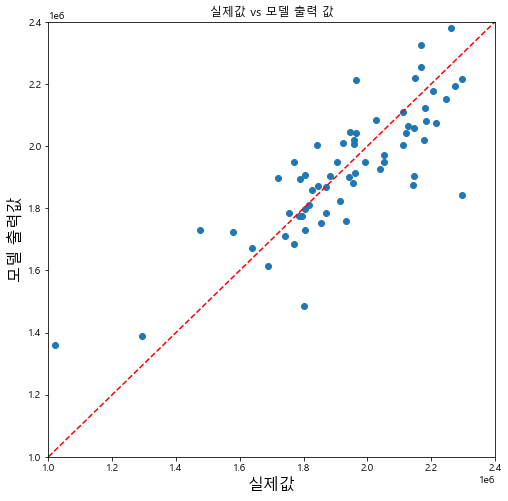

In [112]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([1e6, 2.5e6], [1e6, 2.5e6], ls='--', c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력값', size=16)
plt.xlim(1e6, 2.4e6)
plt.ylim(1e6, 2.4e6)
plt.show()

In [113]:
X_test = sm.add_constant(X_test)

In [114]:
y_test_pred = model_trained.predict(X_test.drop(['환율', '기준금리(연%)', '고용률(%)'], axis=1))
y_test_pred.head() # 예측 결과

8     2.118498e+06
54    2.077518e+06
81    1.918348e+06
31    1.648296e+06
78    1.993800e+06
dtype: float64

### 6. 해당 모델의 성능 정량적 지표로 도출

In [115]:
## 학습용 데이터셋
print('학습용 데이터셋 결과')

# MSE (평균 제곱 오차)
print('MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))

# RMSE (제곱근 평균 제곱 오차)
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# MAE (평균 절대 오차)
print('MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))

# R2_Score (결정계수)
print('R2_Score: {:.3f}'.format(r2_score(y_train, y_train_pred)))

학습용 데이터셋 결과
MSE: 21469180275.453
RMSE: 146523.651
MAE: 109123.934
R2_Score: 0.716


In [116]:
## 테스트용 데이터셋
print('테스트용 데이터셋 결과')

# MSE (평균 제곱 오차)
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))

# RMSE (제곱근 평균 제곱 오차)
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# MAE (평균 절대 오차)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

# R2_Score (결정계수)
print('R2_Score: {:.3f}'.format(r2_score(y_test, y_test_pred)))

테스트용 데이터셋 결과
MSE: 25735000074.895
RMSE: 160421.321
MAE: 113889.055
R2_Score: 0.818


### 7. 교차검증 및 하이퍼 파라미터 튜닝 (GridSearchCV)

- 데이터 수가 작아서 추가적으로 검증

In [117]:
# 회귀는 하이퍼 파라미터가 2개 (절편, 정규화를 해주는지 안해주는지)

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()

# print(lr.get_params().keys())
# dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

param_grid = {'fit_intercept': [True, False],
             'normalize': [False, True],
             }

grid_lr = GridSearchCV(lr, param_grid=param_grid, cv=3, refit=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

grid_lr.fit(X_train, y_train)
y_pred = grid_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('최적의 파라미터', grid_lr.best_params_)
print('최고 성능', grid_lr.best_score_)

print('mse:', mse)
print('r2_score:', r2)

최적의 파라미터 {'fit_intercept': True, 'normalize': False}
최고 성능 0.6418751050940793
mse: 37286605673.75474
r2_score: 0.7482649198522047


### 8. 실제 2022년 1~2월 데이터 회귀식에 대입해보기

In [121]:
# 수출액 = -7.383e+04 * 소비자 물가지수 + 7129.5778 * 국제유가 + 70.6213 * SCFI + 1.606e+04 * 가동률지수(원지수) + 7.27e+06
# 환율 2022-2월 데이터는 우리은행 외환센터 2022년 2월 평균 매매기준율 데이터사용
# 반도체 항공운임 2022-1~2월 데이터는 최근 2년 평균치 사용

test_set = pd.read_csv('./Test_자동차부품.csv')

exports_2022_01 = -7.383e+04 * test_set.iloc[0, 4] + 7129.5778 * test_set.iloc[0, 6] + 70.6213 * test_set.iloc[0, 7]\
                  + 1.606e+04 * test_set.iloc[0, 8] + 7.27e+06

print('예측 2022년 1월 수출액:', int(exports_2022_01))
print('실제 2022년 1월 수출액:', test_set.iloc[0, 1])

예측 2022년 1월 수출액: 1951919
실제 2022년 1월 수출액: 2061375


In [123]:
exports_2022_02 = -7.383e+04 * test_set.iloc[1, 4] + 7129.5778 * test_set.iloc[1, 6] + 70.6213 * test_set.iloc[1, 7]\
                  + 1.606e+04 * test_set.iloc[1, 8] + 7.27e+06

print('예측 2022년 2월 수출액:', int(exports_2022_02))
print('실제 2022년 2월 수출액:', test_set.iloc[1, 1])

예측 2022년 2월 수출액: 1906552
실제 2022년 2월 수출액: 1783051
